# Исследование продаж компьютерных игр

Мы располагаем историческими данными из открытых источников о продажах компьютерных игр, оценки пользователей и экспертов, жанрах и платформам. Необходимо выявить закономерности, которые определяют успешность игры. Это позволит оценить потенциально популярный продукт и спланировать рекламные кампании на будущие периоды.


Мы располагаем данными до 2016 года, которые включают:   
Name — название игры  
Platform — наименование платформы  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг по возрастнойкатегории от организации ESRB (англ. Entertainment Software Rating Board).  
Исходные данные за 2016 год могут быть неполными.

**Цель работы:**  
необходимо выявить определяющие успешность игры закономерности, чтобы позволит менеджерам выбрать потенциально популярный продукт и спланировать рекламные кампании

**План работы:**  
1. Изучить общую информацию о данных о продажах компьютерных игр
2. Подготовить данные для анализа:   
   2.1. проверить пропуски, дубликаты записей, артефакты в данных, оценить типы даных  
   2.2  при необходимости произвести обработку данных  
3. Проведите исследовательский анализ данных:  
   3.1. оценить выпуск игр в разные годы на разных платформах, обределить Топ-платформы  
   3.2. выбрать актуальный период для прогнозирования продаж
   3.3. исследовать продажи в актуальном периоде
   3.4. оценить факторы, влияющие на продажи
   3.5. оценить распределение продаж по жанрам игр
4. Составьте портрет пользователя для следующих регионов (ТОП-5 платформ, ТОП-5 жанров, влияние рейтинга ESRB на продажи в регионе):    
   4.1. Северная Америка  
   4.2. Европа  
   4.3. Япония  
5. Проверьте статистические гипотезы  
   5.1. о равенстве средних оценок пользователей для платформ Xbox One и PC    
   5.2. о неравенстве средних пользовательских оценок для жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)  

### Открываем файл с данными и изучаем общую информацию.

In [ ]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Дата фрейм имеет 16715 записей в 10 столбцах. Названия столбцов сочетают заглавные и строчные буквы. В столбцах с оценками критиков, пользователей и рейтинговой ассоциации наблюдаются существенные пропуски данных. Значения столбца "Year_of_Release" - год выпуска релиза игры имеет вещественный тип данных. Оценка пользователей представлена записями, имеющими тип object, который  может фактически содержать несколько разных типов. Для данных, расположенных в указанном столбце такой тип данных не характерен.

In [ ]:
# оцениваем наличие дубликатов по характерным столбцам
data[data.duplicated(['Name','Platform','Genre','Year_of_Release'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# удаляем дубликаты с переиндексацией строк
data.drop_duplicates(subset=['Name','Platform','Genre','Year_of_Release'],keep='last').reset_index(drop=True)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Готовим данные для анализа

#### Заменяем названия столбцов на строчные буквы

In [ ]:
data.columns=data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработаем пропуски данных

Исследуем данные для принятия решения о преобразовании данных в нужные типы. Считаю, что данные в столбцах "Год выпуска" и "Оценка пользователей" должны стать целым и вещественным типами соответственно, так как далее будут использоваться для анализа продаж по периодам и оценки популярности игр.

In [ ]:
#оцениваем пропуски данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# оцениваем доли пустых ячеек по столбцам
data_columns = ['name','genre','year_of_release','critic_score','user_score','rating']
data_null=[]
for col in data_columns:
    data_null.append(data[col].isna().value_counts()[1]/len(data)*100)
data_null=pd.DataFrame({'Наименование столбцов' : data_columns,'Доля пустых строк в %' : data_null})
data_null= data_null.sort_values('Доля пустых строк в %', ascending=False)
print(data_null)

  Наименование столбцов  Доля пустых строк в %
3          critic_score              51.319174
5                rating              40.478612
4            user_score              40.089740
2       year_of_release               1.609333
0                  name               0.011965
1                 genre               0.011965


In [ ]:
# изучаем уникальные значения в столбцах "Год выпуска", "Оценка пользователей", "Оценка критиков", "Рейтинг" на предмет аномалий.
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Кроме данных столбца "user_score" в других столбцах аномий нет.

In [ ]:
# оценим долю аномальных значений
print('В столбце "user_score" аномальных значений "tbd" {:.1%}'. format((data['user_score']=='tbd').sum()/len(data)))

В столбце "user_score" аномальных значений "tbd" 14.5%


в столбце "Год выпуска" учитывая незначительность незаполненных данных - 1.6% строки с пустыми значениями удалим;
в столбце "Оценка критиков " слишком много строк с пропусками, в данном случае логической какой замены не произвести, потому что это субъективное мнение критиков, а замена может привести к искажению результатов исследования.
в столбце "Оценка пользователей" аномальных значений больше 14% и это слишком много для удаления. Значит они не случайны. По данным поисковых систем TBD -  может означать разные сокращения, но в контексте оценки компьютерных игр означает To Be Determined (будет определено). Как будто пользователь еще неопределился, целесообразно эти пропуски заменить значением NaN.    

In [ ]:
# удаляем некритичные строки с пустыми значениями и производим замену аномалных значений
data = data.dropna(subset=['year_of_release','name','genre']).reset_index(drop=True)
data.loc[data['user_score'] == 'tbd','user_score'] = '0'

#### Преобразуем данные в нужные типы

In [ ]:
data = data.astype({'year_of_release': 'int64', 'user_score':'float64'})

In [ ]:
# проверяем результаты преобразований
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Причины пропуска данных в столбце "rating" возможно связаны с датой организации ассоциации ESRB - 1994 год. Надо проверить.

In [ ]:
rating_year = data[['year_of_release','rating']]
rating_year.tail(10)

,year_of_release,rating
16434,2009,NaN
16435,2003,T
16436,2014,NaN
16437,2002,NaN
16438,2008,NaN
16439,2016,NaN
16440,2006,NaN
16441,2016,NaN
16442,2003,NaN
16443,2016,NaN


Предположение не подтвердилось, пропуски есть и в более поздних годах выпуска игр, поэтому данные оставляем без изменений.

In [ ]:
data['rating']=data['rating'].fillna('no_rating')

#### Подсчитываем суммарные продажи во всех регионах и записываем их в отдельный столбец

In [ ]:
# Суммируем продажи по всем регионам. Записываем их в новом столбце 'reg_sales'.
data.insert(9,'reg_sales',data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1),allow_duplicates=False)

In [ ]:
# проверяем результат добавления столбца
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,reg_sales,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,82.54,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,40.24,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,35.52,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,32.77,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,31.38,NaN,no_rating


**Вывод**  
В процессе обработки данных провели следующие мероприятия:  
- заменили на строчные буквы наименования столбцов;  
- оценили долю пустых значений в категорированных столбцах;  
- заменили типы данных по столбцу 'year_of_release'на целочисленные и по столбцу 'user_score' на вещественные 'float64';
- удалили некритичные пропуски в столбцах 'year_of_release','name','genre';
- избавились от значения 'tbd' в столбце 'user_score', заменив его на "0";  
- заменили пустые значения на маркеры в столбце с рейтингом агентства ESRB для того, чтобы строки с пустыми значениями в указанном столбце могли использоваться при формировании;  
- подсчитали общие (мировые) продажи на платформах, для этого создали новый столбец "reg_sales".

### Проводим исследовательский анализ данных

#### Оценим сколько игр выпускалось в разные годы

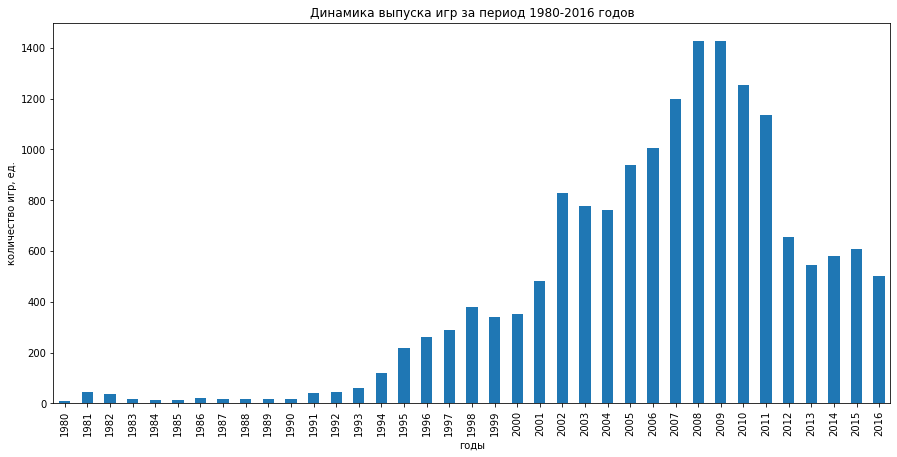

In [ ]:
data.groupby(['year_of_release'])['name'].count().plot.bar(
figsize =(15,7),
xlabel = 'годы',
ylabel = 'количество игр, ед.',
title = 'Динамика выпуска игр за период 1980-2016 годов'
)
plt.show()

Согласно данным резкое развитие производства компьютерных игр наблюдается с 1994 года, в 2002 году новинок становится в два раза больше по отношению к предыдущему году. В 2008 году наблюдается пик продаж. С 2012 года на протяжении пяти лет количество новых релизов варьируется около 600. Целесообразно именно эти пять последних лет использовать для планирования рекламных компаний. Данные до 1994 года не представляют интереса ввиду выпуска в эти годы малого количества игр.

#### Исследуем продажи по платформам

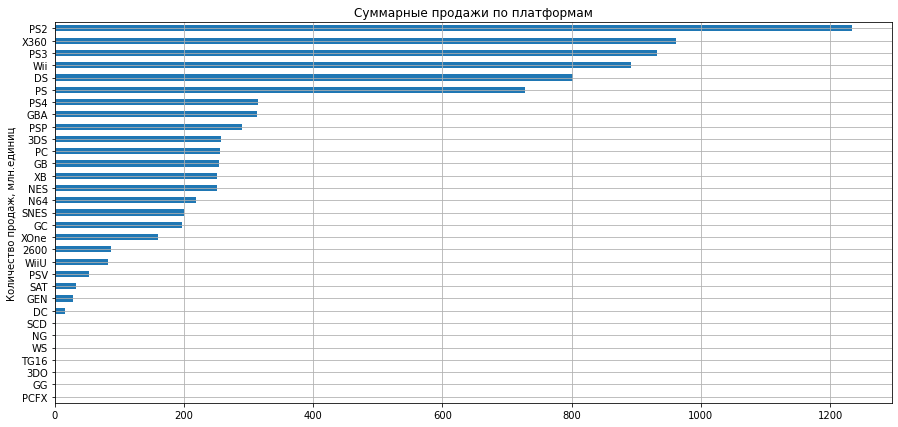

In [ ]:
data.groupby('platform')['reg_sales'].sum().sort_values().plot(
kind='barh',
figsize=(15, 7),
title='Суммарные продажи по платформам',
grid=True,
xlabel = 'Количество продаж, млн.единиц',
ylabel= 'Наименование платформы'
)
plt.show()

Наибольшие суммарные продажи наблюдаются на платформах PS2, X360, PS3, Wii, DS, PS. Построим распределение продаж игр по годам в разрезе указанных платформ.

#### Выбераем платформы с наибольшими суммарными продажами и строим распределение по годам

In [ ]:
# сделаем выборку по платформам, входящим в ТОП-6
data_platform = data.loc[(data['platform']=='PS2')|(data['platform']=='X360')|(data['platform']==
                               'PS3')|(data['platform']=='Wii')|(data['platform']=='DS')|(data['platform']=='PS')]

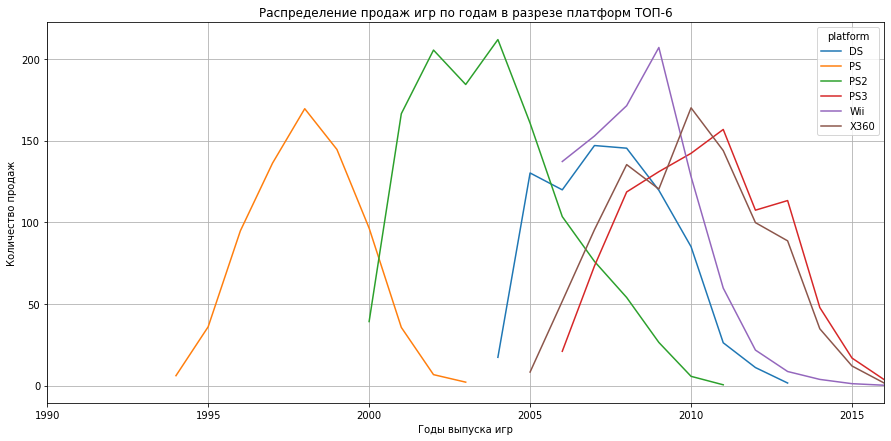

In [ ]:
# строим распределение продаж игр в разрезе платформ ТОП-6
data_platform.pivot_table(index='year_of_release',
                          columns='platform',
                          values='reg_sales',
                          aggfunc='sum').plot(figsize=(15,7),
                                              title="Распределение продаж игр по годам в разрезе платформ ТОП-6",
                                             grid=True)
plt.xlabel('Годы выпуска игр', fontsize=10)
plt.ylabel('Количество продаж', fontsize=10)
plt.xlim(1990,2016)
plt.show()

Согласно статистике самой популярной игровой платформой стала PS2. PS2 имела один из самых длинных жизненных циклов в истории игровой индустрии. Вторая платформа по объему продаж это Wii - платформа 7 поколения. Выпуск ее пришелся на период между релизами PS2 и PS3.

Из графика можно сделать вывод о жизни платформ:  
    DS годы жизни 2004-2013 - 9 лет;  
    PS годы жизни 1994-2003 - 9 лет;  
    PS2 годы жизни 2000-2011 - 11 лет;  
    PS3 годы жизни 2006-2016 - 10 лет;  
    Wii годы жизни 2006-2016 - 10 лет;  
    X360 годы жизни 2005-2016 - 11 лет.  
    Средний год жизни составляет 10 лет, из которых согласно анализу срок активных продаж на платформе наблюдаются в среднем 4-6 лет, затем в течении 4-5 лет происходит равномерное угасание спроса.

Определим актуальный период для прогнозирования рекламных компаний на 2017 год.

In [ ]:
# определим (для надежности) визуально на каких платформах растут продажи
pd.set_option('display.max_columns', None)
data.pivot_table(index='year_of_release',
                          columns='platform',
                          values='reg_sales',
                          aggfunc='sum')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


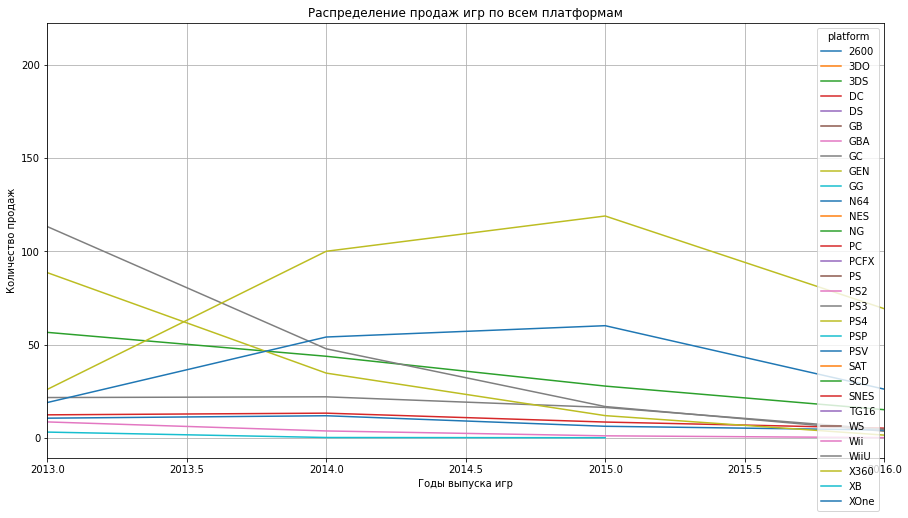

In [ ]:
# и также визуализируем
data.pivot_table(index='year_of_release',
                 columns='platform',
                 values='reg_sales',
                 aggfunc='sum').plot(figsize=(15,8),
                                     title="Распределение продаж игр по всем платформам",
                                     grid=True)
plt.xlabel('Годы выпуска игр', fontsize=10)
plt.ylabel('Количество продаж', fontsize=10)
plt.xlim(2013,2016)
plt.show()

#### Исследуем глобальные продажи игр в разбивке по платформам с применением графика «ящик с усами».

In [ ]:
# исследуем данные в разрезе платформ и продаж в актуальном периоде 2014-2016 годов
data_activ = data.loc[data['year_of_release']>2013]
data_activ.groupby('platform')['reg_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


In [ ]:
# рассчитываем квантили для платформ в актуальном периоде 2013-2016 годов
q1=data_activ['reg_sales'].quantile(0.25)
q3=data_activ['reg_sales'].quantile(0.75)
iqr=q3-q1
data_activ = data_activ.query('reg_sales <= @q3+1.5*@iqr')

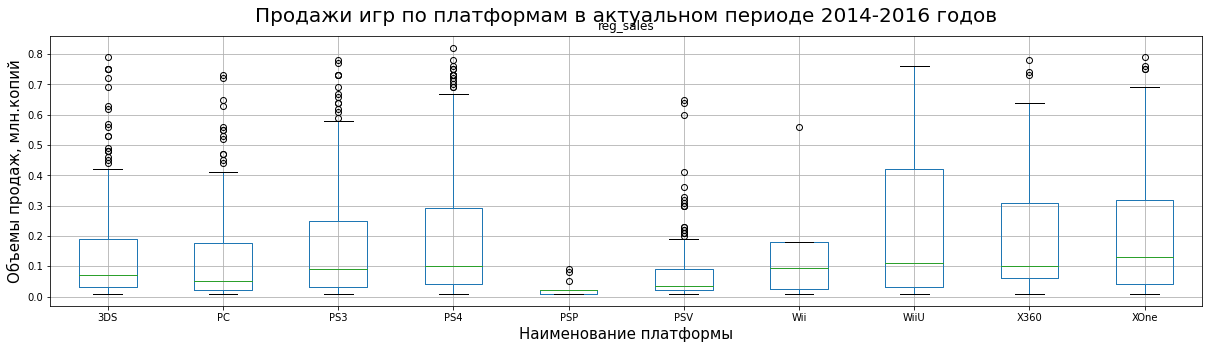

In [ ]:
data_activ.boxplot(column='reg_sales', by='platform', figsize=(20,5))
plt.suptitle('Продажи игр по платформам в актуальном периоде 2014-2016 годов', fontsize=20)
plt.xlabel('Наименование платформы', fontsize=15)
plt.ylabel('Объемы продаж, млн.копий', fontsize=15)
plt.show()

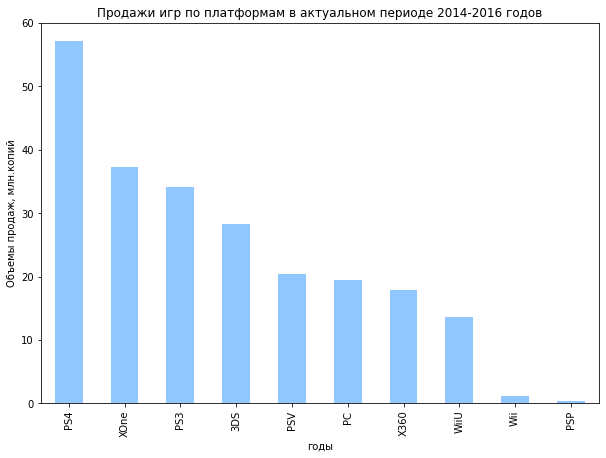

In [ ]:
plt.style.use('seaborn-pastel')
data_activ.groupby('platform')['reg_sales'].sum().sort_values(ascending=False).plot.bar(
figsize =(10,7),
xlabel = 'годы',
ylabel = 'Объемы продаж, млн.копий',
title = 'Продажи игр по платформам в актуальном периоде 2014-2016 годов'
);
plt.show()

В целях прогнозирования были исключены затухающие платформы 3DS, PC, PSP, PSV. Оставшиеся 6 платформ имеют примерно одинаковые медианные значения по продажам, значит их можно использовать для адекватного прогнозирования.

#### Сформируем массив из платформ и оценок, посмотрим есть ли коллеряция

In [ ]:
#print(data_activ['platform'].unique())
data_score=data_activ[['platform','critic_score','user_score','reg_sales']].copy()
#print(data_score['platform'].unique())
#print(data_score.head(20))
print(data_score.groupby('platform').corr())
#data_score.query('platform == "DS"')['reg_sales'].corr(data_score['user_score'])

                       critic_score  user_score  reg_sales
platform                                                  
3DS      critic_score      1.000000    0.680060   0.375589
         user_score        0.680060    1.000000   0.404014
         reg_sales         0.375589    0.404014   1.000000
PC       critic_score      1.000000    0.461627   0.330980
         user_score        0.461627    1.000000   0.130288
         reg_sales         0.330980    0.130288   1.000000
PS3      critic_score      1.000000    0.659473   0.232877
         user_score        0.659473    1.000000   0.308165
         reg_sales         0.232877    0.308165   1.000000
PS4      critic_score      1.000000    0.578203   0.292199
         user_score        0.578203    1.000000   0.160773
         reg_sales         0.292199    0.160773   1.000000
PSP      critic_score           NaN         NaN        NaN
         user_score             NaN         NaN        NaN
         reg_sales              NaN         NaN   1.0000

In [ ]:
#функция для построения графиков зависимости продаж от оценок критиков и пользователей по ТОП-6
def score_platform (name):
    data_A = data_score[data_score['platform']==name]
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='reg_sales', data=data_A, ax=ax[0])
    sns.scatterplot(x='critic_score', y='reg_sales', data=data_A, ax=ax[1])
    fig.suptitle(name, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    print('Зависимость продаж от оценки пользователей на платформе', name, 'находится на уровне ',
         data_A['reg_sales'].corr(data_score['user_score']))
    print('Зависимость продаж от оценки критиков на платформе', name, 'находится на уровне ',
          data_A['reg_sales'].corr(data_score['critic_score']))
    plt.show()

Зависимость продаж от оценки пользователей на платформе PS4 находится на уровне  0.16077343462804097
Зависимость продаж от оценки критиков на платформе PS4 находится на уровне  0.2921992070711341


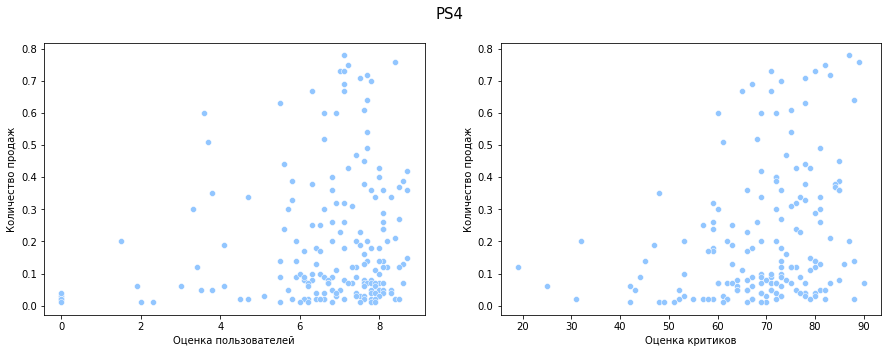

Зависимость продаж от оценки пользователей на платформе 3DS находится на уровне  0.40401361546151965
Зависимость продаж от оценки критиков на платформе 3DS находится на уровне  0.3755894983261854


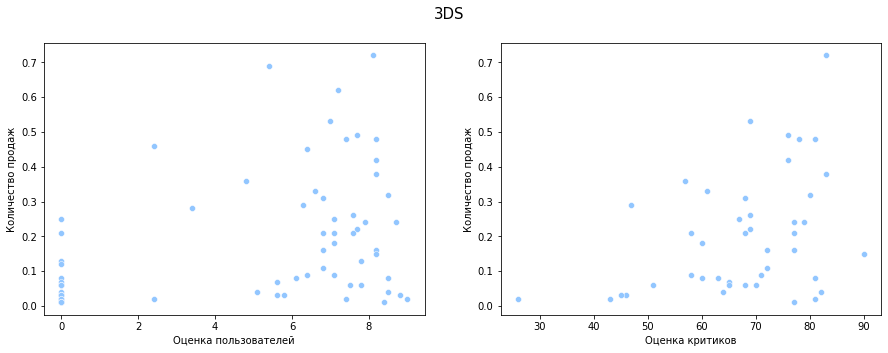

Зависимость продаж от оценки пользователей на платформе XOne находится на уровне  0.1770394570442049
Зависимость продаж от оценки критиков на платформе XOne находится на уровне  0.30231256389199607


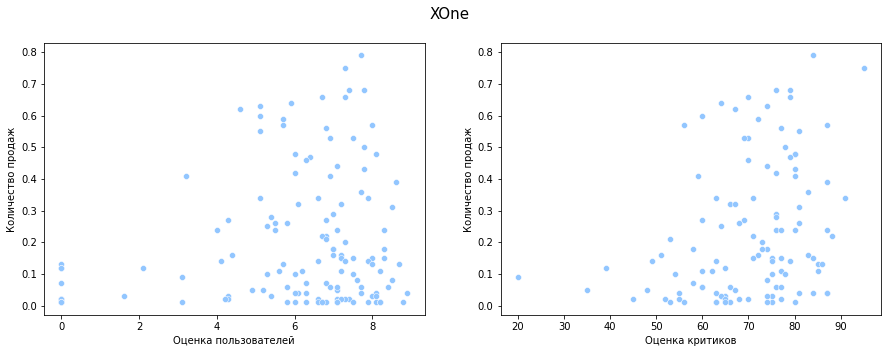

Зависимость продаж от оценки пользователей на платформе X360 находится на уровне  0.18210238157129305
Зависимость продаж от оценки критиков на платформе X360 находится на уровне  0.4596923333193218


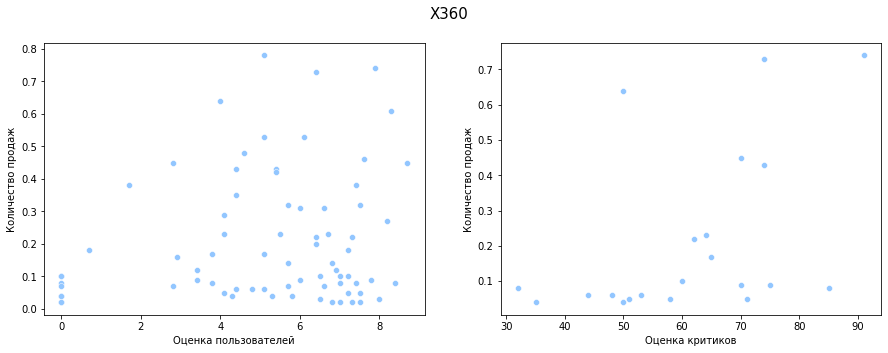

Зависимость продаж от оценки пользователей на платформе PS3 находится на уровне  0.308164907059325
Зависимость продаж от оценки критиков на платформе PS3 находится на уровне  0.23287681297202847


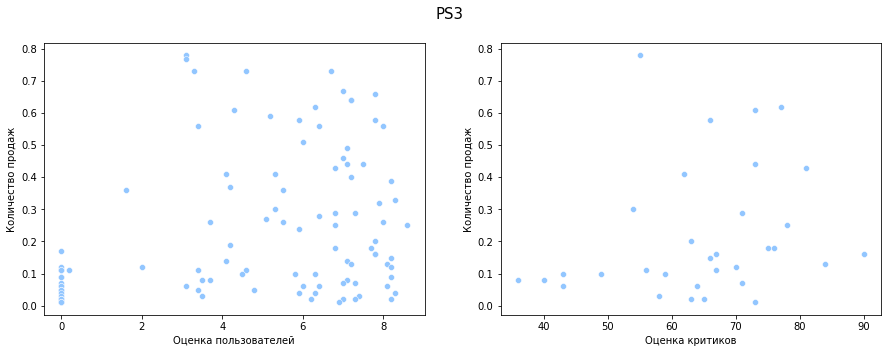

Зависимость продаж от оценки пользователей на платформе WiiU находится на уровне  0.29601591660472476
Зависимость продаж от оценки критиков на платформе WiiU находится на уровне  0.2642699691157501


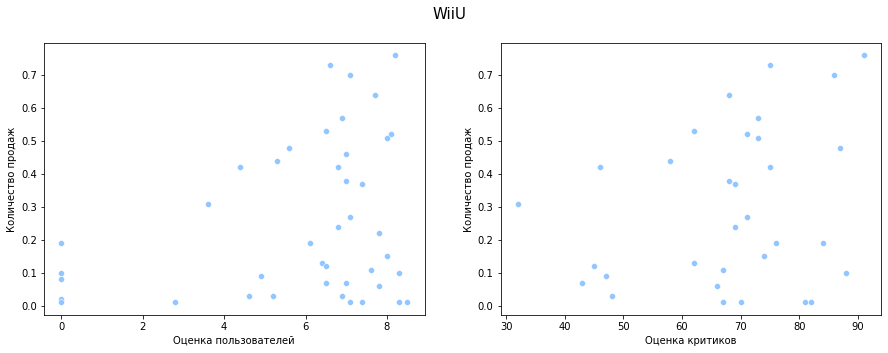

Зависимость продаж от оценки пользователей на платформе PC находится на уровне  0.13028843006194668
Зависимость продаж от оценки критиков на платформе PC находится на уровне  0.3309796961709192


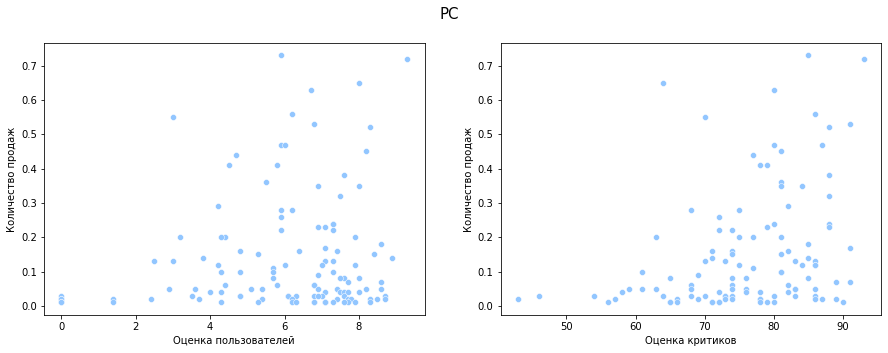

Зависимость продаж от оценки пользователей на платформе PSV находится на уровне  0.1285224992534306
Зависимость продаж от оценки критиков на платформе PSV находится на уровне  0.04266490657009526


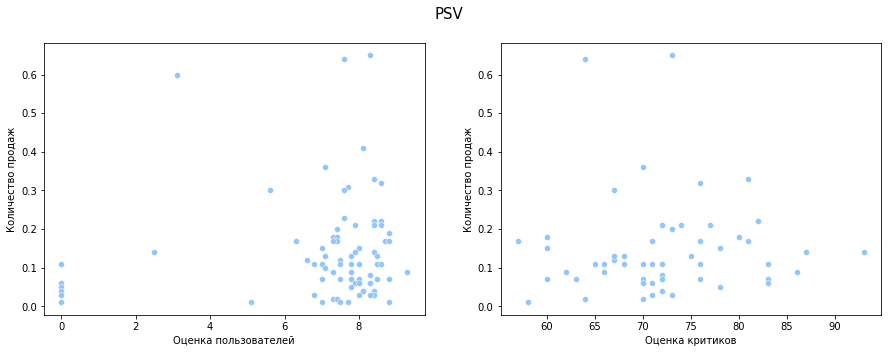

Зависимость продаж от оценки пользователей на платформе Wii находится на уровне  0.9246841570828406
Зависимость продаж от оценки критиков на платформе Wii находится на уровне  nan


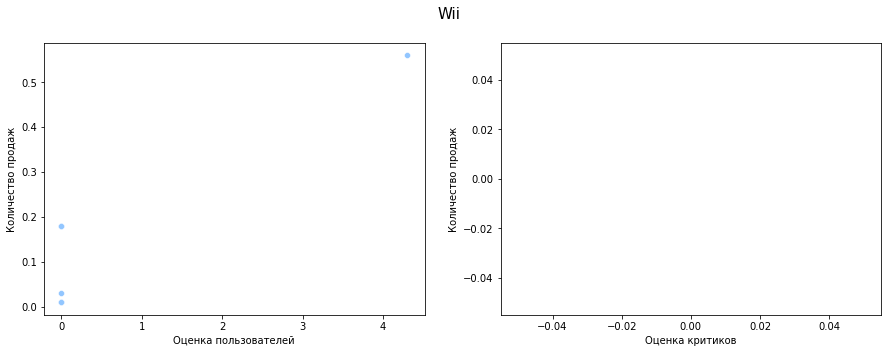

Зависимость продаж от оценки пользователей на платформе PSP находится на уровне  nan
Зависимость продаж от оценки критиков на платформе PSP находится на уровне  nan


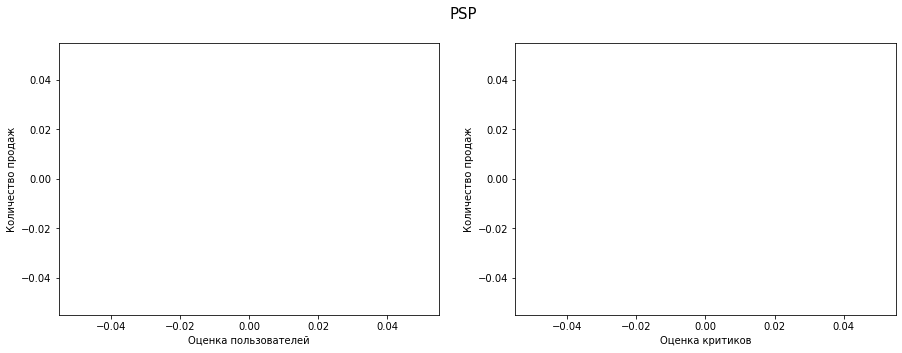

In [ ]:
#name_activ_platform = data_activ.query('year_of_release>=2013')['platform'].unique()
name_activ_platform = data_score['platform'].unique()
#data_score = data_score.dropna(subset=['user_score','critic_score'])
for i in name_activ_platform:
     score_platform (i)

Анализ показывает, что влияние оценок критиков на продажи сильнее, чем влияние оценок пользователей.

#### Исследуем жанры игровых платформ

In [ ]:
# Сгруппируем датасет по жанрам и продажам в актуальном периоде
data_activ.groupby('genre')['reg_sales'].sum().sort_values(ascending=False)

genre
Action          83.03
Role-Playing    33.18
Sports          28.33
Shooter         23.15
Misc            17.84
Adventure       12.68
Racing           8.86
Fighting         7.49
Simulation       5.84
Platform         4.37
Strategy         3.96
Puzzle           1.02
Name: reg_sales, dtype: float64

Самыми прибыльными жанрами являются экшн-игры на втором месте спортивные игры. Отставание существенное почти в 2,5 раза ниже.   Лидером продаж являются экшн-игры. Очень низкие продажи наблюдаются у игр жанром "Головоломка". Видимо игра - это снятие стресса прежде всего, переключение внимания. Поэтому игры, требующие умственных усилий, спросом не пользуются.

In [ ]:
data_activ.pivot_table(index='genre',values=['reg_sales','name'],aggfunc={'reg_sales':['sum','mean','median'],'name':'count'})

name reg_sales              
             count      mean median    sum
genre                                     
Action         562  0.147740  0.070  83.03
Adventure      181  0.070055  0.030  12.68
Fighting        52  0.144038  0.095   7.49
Misc           105  0.169905  0.080  17.84
Platform        30  0.145667  0.100   4.37
Puzzle          13  0.078462  0.040   1.02
Racing          61  0.145246  0.070   8.86
Role-Playing   194  0.171031  0.085  33.18
Shooter         80  0.289375  0.265  23.15
Simulation      41  0.142439  0.060   5.84
Sports         128  0.221328  0.120  28.33
Strategy        37  0.107027  0.060   3.96

Согласно исследованию на ряду с самым продаваемым жанром нисколько не уступают и другие жанры компьютерных игр. В итоге самым перспективным жанром определен жанр shooter - "стрелялки". Совсем не перспективными видятся игры жанров Adventure(приключения) и Puzzle (головоломки). Визуализируем результат.

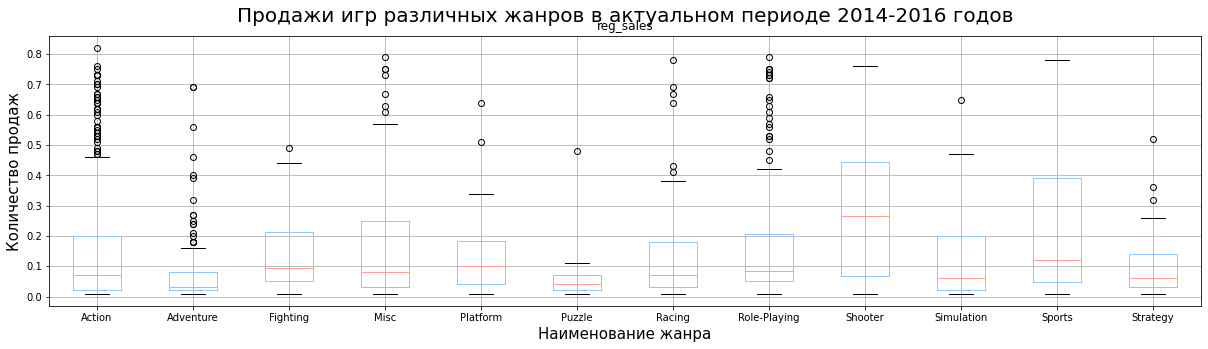

In [ ]:
data_activ.boxplot(column='reg_sales', by='genre', figsize=(20,5))
plt.suptitle('Продажи игр различных жанров в актуальном периоде 2014-2016 годов', fontsize=20)
plt.xlabel('Наименование жанра', fontsize=15)
plt.ylabel('Количество продаж', fontsize=15)
plt.show()

### Составляем портрет пользователя каждого региона

#### Портрет пользователя компьютерных игр Северной Америки

In [ ]:
na_portret_platform = data_activ.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_portret_platform5 = data_activ.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_portret_platform5.loc['Other']=na_portret_platform[5:].sum()
print('Самые популярные игровые платформы в Северной Америке','\n',na_portret_platform5)

Самые популярные игровые платформы в Северной Америке 
 platform
XOne     21.00
PS4      17.75
PS3      10.24
X360      9.95
WiiU      6.35
Other    13.69
Name: na_sales, dtype: float64


In [ ]:
na_portret_genre=data_activ.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_portret_genre5 = data_activ.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_portret_genre5.loc['Other']=na_portret_genre[5:].sum()
print('Самые популярные игровые жанры в Северной Америке','\n',na_portret_genre5)

Самые популярные игровые жанры в Северной Америке 
 genre
Action          27.90
Sports          11.35
Shooter         10.11
Role-Playing     9.46
Misc             7.32
Other           12.84
Name: na_sales, dtype: float64


In [ ]:
na_portret_rating=data_activ.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_portret_rating5 = data_activ.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
na_portret_rating5.loc['Other']=na_portret_rating[5:].sum()
print('Зависимость объемов продаж от ESRB в Северной Америке','\n',na_portret_rating5)

Зависимость объемов продаж от ESRB в Северной Америке 
 rating
E10+         19.01
no_rating    18.87
M            17.56
T            13.72
E             9.82
Other         0.00
Name: na_sales, dtype: float64


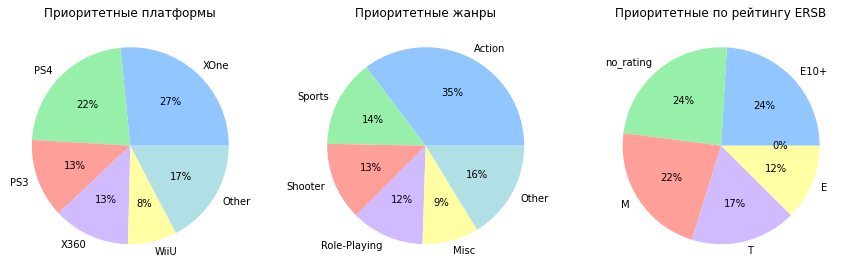

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15));
#ax1 = fig.add_subplot(1,3,1)
na_portret_platform5.plot(
    kind='pie',
    title = 'Приоритетные платформы',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[0]
);
#ax2 = fig.add_subplot(1,3,2)
na_portret_genre5.plot(
    kind='pie',
    title = 'Приоритетные жанры',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[1]
);
#ax3 = fig.add_subplot(1,3,3)
na_portret_rating5.plot(
    kind='pie',
    title = 'Приоритетные по рейтингу ERSB',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[2]
);
plt.show()

**Портрет игрока в Северной Америке**  
Пользователи Северной Америки предпочитают играть на платформе XOne в игры экшен для категории 10+. Как видно из распределения продаж в разрезе рейтинга ERSB, он не влияет на объемы продаж. То есть пользователи при принятии решения о приобретении игры не обращают внимание на отсутствие возрастных категорий игр. Доля продаж в Северной Америке некатегорированных игр  находится на одном уровне с играми для 10+.

#### Портрет пользователя компьютерных игр в Европе

In [ ]:
eu_portret_platform=data_activ.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_portret_platform5 = data_activ.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_portret_platform5.loc['Other']=eu_portret_platform[5:].sum()
print('Самые популярные игровые платформы в Европе','\n',eu_portret_platform5)

Самые популярные игровые платформы в Европе 
 platform
PS4      23.43
PC       13.24
XOne     13.00
PS3      10.10
X360      6.26
Other    14.00
Name: eu_sales, dtype: float64


In [ ]:
eu_portret_genre=data_activ.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_portret_genre5 = data_activ.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_portret_genre5.loc['Other']=eu_portret_genre[5:].sum()
print('Самые популярные игровые жанры в Европе','\n', eu_portret_genre5)

Самые популярные игровые жанры в Европе 
 genre
Action          29.09
Sports          10.80
Shooter         10.04
Role-Playing     7.54
Racing           5.06
Other           17.50
Name: eu_sales, dtype: float64


In [ ]:
eu_portret_rating=data_activ.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_portret_rating5 = data_activ.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_portret_rating5.loc['Other']=eu_portret_rating[5:].sum()
print('Зависимость объемов продаж от ESRB в Европе','\n',eu_portret_rating5)

Зависимость объемов продаж от ESRB в Европе 
 rating
no_rating    20.37
M            16.86
E10+         16.70
E            13.84
T            12.26
Other         0.00
Name: eu_sales, dtype: float64


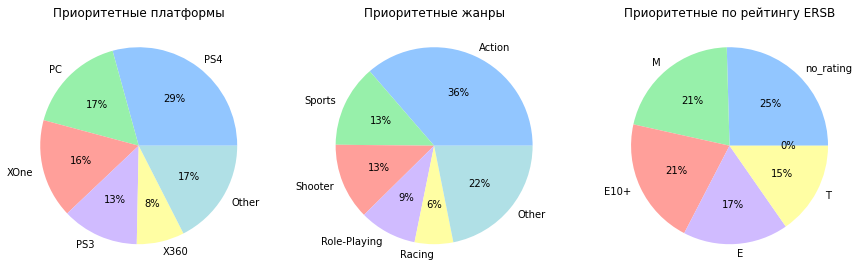

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15));
#ax1 = fig.add_subplot(1,3,1)
eu_portret_platform5.plot(
    kind='pie',
    title = 'Приоритетные платформы',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[0]
);
#ax2 = fig.add_subplot(1,3,2)
eu_portret_genre5.plot(
    kind='pie',
    title = 'Приоритетные жанры',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[1]
);
#ax3 = fig.add_subplot(1,3,3)
eu_portret_rating5.plot(
    kind='pie',
    title = 'Приоритетные по рейтингу ERSB',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[2]
);
plt.show()

**Портрет игрока в Европе**    
В Европе вне конкуренции платформа PS4 с играми в стиле экшен, в возрастной категории лидируют две группы: игры для тех, кому 10+ и игры для взрослых.Как видно из распределения продаж в разрезе рейтинга ERSB, он не влияет на объемы продаж. То есть пользователи при принятии решения о приобретении игры не обращают внимание на отсутствие возрастных категорий игр. Доля продаж в Европе некатегорированных игр находится на первом месте и составляют четверть рынка.

#### Портрет пользователя компьютерных игр в Японии

In [ ]:
jp_portret_platform=data_activ.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_portret_platform5 = data_activ.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_portret_platform5.loc['Other']=jp_portret_platform[5:].sum()
print('Самые популярные игровые платформы в Японии','\n',jp_portret_platform5)

Самые популярные игровые платформы в Японии 
 platform
3DS      15.39
PSV      13.64
PS3       9.76
PS4       8.06
WiiU      1.60
Other     0.48
Name: jp_sales, dtype: float64


In [ ]:
jp_portret_genre=data_activ.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_portret_genre5 = data_activ.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_portret_genre5.loc['Other']=jp_portret_genre[5:].sum()
print('Самые популярные игровые жанры в Японии','\n', jp_portret_genre5)

Самые популярные игровые жанры в Японии 
 genre
Action          18.17
Role-Playing    13.73
Misc             4.33
Adventure        3.49
Sports           2.89
Other            6.32
Name: jp_sales, dtype: float64


In [ ]:
jp_portret_rating=data_activ.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_portret_rating5 = data_activ.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_portret_rating5.loc['Other']=jp_portret_rating[5:].sum()
print('Зависимость объемов продаж от ESRB в Японии','\n',jp_portret_rating5)

Зависимость объемов продаж от ESRB в Японии 
 rating
no_rating    32.23
T             9.33
M             2.93
E10+          2.28
E             2.16
Other         0.00
Name: jp_sales, dtype: float64


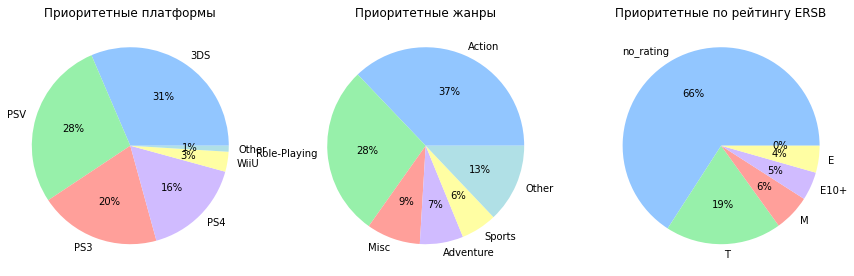

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15));
#ax1 = fig.add_subplot(1,3,1)
jp_portret_platform5.plot(
    kind='pie',
    title = 'Приоритетные платформы',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[0]
);
#ax2 = fig.add_subplot(1,3,2)
jp_portret_genre5.plot(
    kind='pie',
    title = 'Приоритетные жанры',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[1]
);
#ax3 = fig.add_subplot(1,3,3)
jp_portret_rating5.plot(
    kind='pie',
    title = 'Приоритетные по рейтингу ERSB',
    ylabel = '',
    autopct='%1.0f%%',
    ax = axes[2]
);
plt.show()

**Портрет игрока в Японии:**  
В Японии 50 процентов продаж осуществляется на платформе PS3. спросом пользуются игры в стиле экшен. Наиболее восстребованными являются игры в категории для подростков. Как видно из распределения продаж в разрезе рейтинга ERSB, он не влияет на объемы продаж. То есть пользователи при принятии решения о приобретении игры как и во всех других регионах не обращают внимание на отсутствие возрастных категорий игр. Доля продаж в Японии некатегорированных игр находится занимают большую часть рынка или 66 процентов.

При прогнозировании рекламных компаний в приоритетном порядке надо учитывать популярность платформ в разных странах. Кроме того, несмотря на то что большая часть пользователей предпочитает игры в стиле экшн, перспективным жанром определяется жанр shooter - "стрелялки". Совсем не перспективными видятся игры жанров Adventure(приключения) и Puzzle (головоломки). Следует отметить, что отсуствие рейтинга агенства ERSB не влияет на продажи ни в одном из рассмотренных регионов.

### Проверяем гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [ ]:
from scipy import stats as st
import numpy as np

**Вопрос 1**

- Ho - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (разница средних равна нулю);
- Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [ ]:
#Находим средние значения рейтингов на платформах
XOne_user_score=data_activ[data_activ['platform']=="XOne"]['user_score'].dropna()
PC_user_score=data_activ[data_activ['platform']=="PC"]['user_score'].dropna()
print('Средняя оценка на платформе XOne', XOne_user_score.mean())
print('Средняя оценка на платформе PC', PC_user_score.mean())

Средняя оценка на платформе XOne 6.057894736842105
Средняя оценка на платформе PC 6.060975609756096


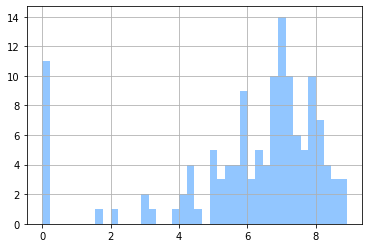

In [ ]:
#проверяем на нормальность выборки из генеральной совокупности
XOne_user_score.hist(bins=40)
plt.show()

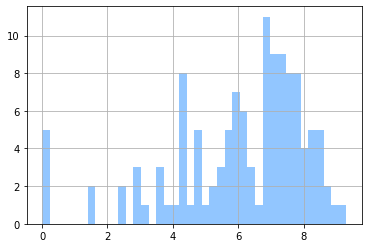

In [ ]:
PC_user_score.hist(bins=40)
plt.show()

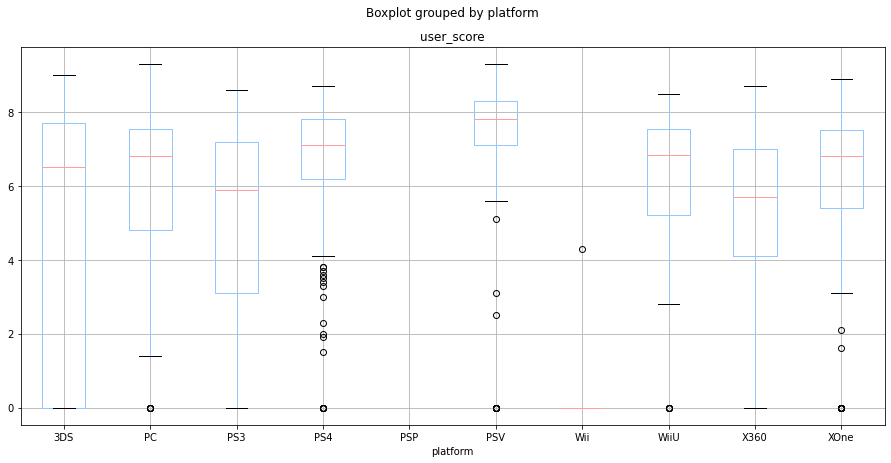

In [ ]:
# посмотрим на выбросы оценок на платформах "XOne" и "PC"
data_activ.boxplot(column='user_score', by = 'platform', figsize=(15,7))
plt.show()

**Обоснование выбора метода проверки гипотезы:**
    Рассматриваем две генеральных совокпности: оценки пользователей, сделанные на платформе XOne и оценки пользователей, сделанные на платформе PC. Пользователи - случайные люди и их игра на платформах между собой независима, также как и их оценки.
Графики показывают, что распределение выборки не является нормальным и есть выбросы, значит применение t-теста может привести к вероятности возникновения ошибок первого рода. Применим тест U-тест Манна-Уитни чтобы определить: есть статистически значимая разница в средних значениях пользовательских рейтингах на платформах Xbox One и PC.

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(XOne_user_score,PC_user_score)
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, принамаем H1.')

stat=8371.500, p=0.746
Нет досточных оснований, чтобы отклонить H0


**Выводы**. У нас нет достаточных доказательств, чтобы сказать, что истинное среднее значение пользовательских рейтингов на платформах Xbox One и PC не одинаково.

**Вопрос 2**

- Ho - Средние пользовательские рейтинги жанров Action  и Sports одинаковые (разница средних равна нулю);
- Н1 - Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

In [ ]:
Action_genre=data_activ[data_activ['genre']=="Action"]['user_score'].dropna()
Sports_genre=data_activ[data_activ['genre']=="Sports"]['user_score'].dropna()
print('Средняя оценка жанра экнш', Action_genre.mean())
print('Средняя оценка жанра спортивные соревнования', Sports_genre.mean())

Средняя оценка жанра экнш 5.827586206896552
Средняя оценка жанра спортивные соревнования 4.697115384615385


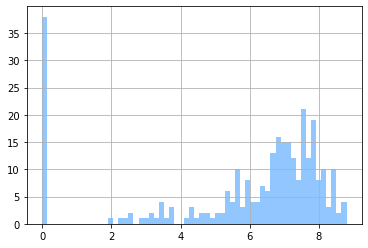

In [ ]:
#проверяем на нормальность выборки из генеральной совокупности
Action_genre.hist(bins=60)
plt.show()

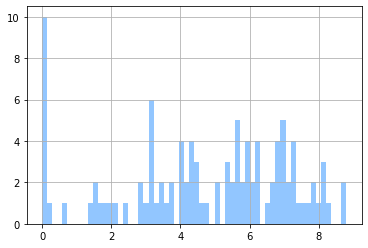

In [ ]:
#проверяем на нормальность выборки из генеральной совокупности
Sports_genre.hist(bins=60)
plt.show()

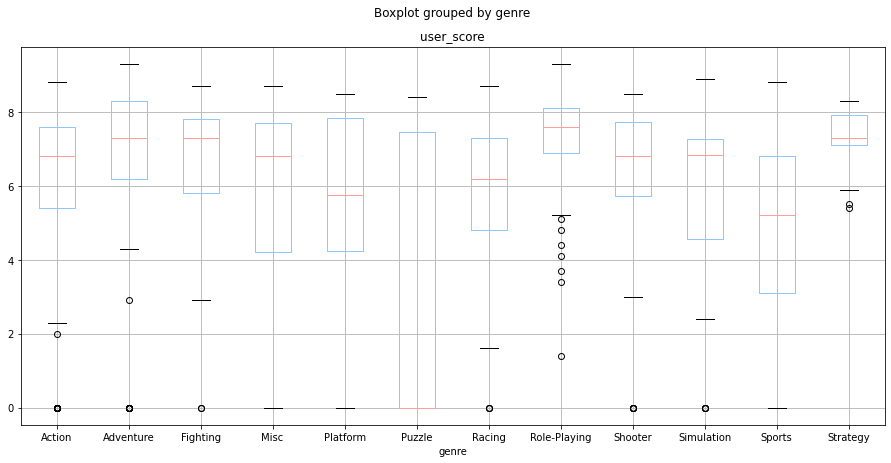

In [ ]:
# посмотрим на выбросы оценок на платформах "XOne" и "PC"
data_activ.boxplot(column='user_score', by = 'genre', figsize=(15,7))
plt.show()

**Обоснование выбора метода проверки гипотезы:**
    Рассматриваем две генеральных совокпности: оценки пользователей, сделанные на платформе XOne и оценки пользователей компьютерных игр в разрезе жанров. Пользователи - случайные люди и их оценка игр разного жанра между собой независима.
Графики показывают, что распределение выборки не является нормальным (смещена вправо, с права отсутствует хвост стремящийся к нулю) и есть выбросы, значит применение t-теста может привести к вероятности возникновения ошибок первого рода. Применим тест U-тест Манна-Уитни, чтобы определить: есть статистически значимая разница в средних значениях пользовательских рейтингах игр разных жанров, например Action и Sport.

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(Action_genre,Sports_genre)
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Нет досточных оснований, чтобы отклонить H0')
else:
    print('Есть достаточно оснований, чтобы отклонить H0, принамаем H1.')

stat=19991.000, p=0.000
Есть достаточно оснований, чтобы отклонить H0, принамаем H1.


**Выводы**. У нас есть достаточно доказательств, чтобы сказать, что истинное среднее значение пользовательских рейтингов в зависимости от выбора игр разного жанра экшн или спортивные игры не одинаково.

### Общий вывод

Мы провели исследование продаж компьютерных игр на различных платформах по открытым данным с 1980 по 2016 год.
И пришли к следующим выводам.
1. Резкое производво компьтерных игр на различных платформах началось с 1994 года и к 2016 году наблюдается затухание этой сферы индустрии.
2. Средний жизненный цикл платформы составляет от 6 до 10 лет, при этом примерно поровну делится период активных продаж и затухания.
3. Для прогнозирования рекламных кампаний предпочтительно выбрать данные в период не более 2-3 год, в целях настоящего исследования за актуальный период принимаем перод с 2014 по 2016 годы.
4. На продажи игр в меньшей степени влиют пользовательские оценки по сравнению с оценками критиков. Однако явной корреляции между продажами и оценками выявлено не было.
5. Отмечено что видимая успешность игр в жанре "action" обусловлена большим количеством пользователей. Самым перспективным был определен жанр shooter - "стрелялки". Совсем не перспективными определены игры жанров Adventure(приключения) и Puzzle (головоломки).
5. Составлены портреты пользователей компьютерных игр из Северной Америки, Европы, Японии. Следует отметить, что при планировании рекламных кампаний в разных регионах необходимо учитывать географию пользователей и их возрастную кагорту. Во всех трех исследуемых регионах выявлены разные приоритетные платформы и разные приоритетные категории игр по системе ESBC.
6. В исследовании применены статистические инструменты - проведена проверка двух гипотез о среднем. При формулировке нулевой и альтернативной гипотезы использовалось правило, что нулевая гипотеза всегда "грустая" (пессимистическая). Критерием для проверки гипотез выбран уровень значимости 0,05. При таком значении мы примаем вероятность ошибки первого рода, т.е. когда мы отвергнем гипотезу, при которой она будет верна.
